In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [215]:
read_data=pd.read_csv(r'D:\Machine_Learning\scikit_learn\data\data\titanic_dataset.csv')

# Các đặc trưng của dataset Titanic
### PassengerId:
Chỉ mục duy nhất cho mỗi hành khách, không mang thông tin quan trọng trong việc phân loại hành khách sống hay chết trên tàu.
### Survived: target
Biến mục tiêu mà chúng ta muốn dự đoán, cho biết hành khách đã sống sót (1) hay không (0).
### Pclass:
Đánh giá địa vị xã hội và địa vị kinh tế của hành khách. Có thể quan trọng vì những hành khách ở tầng lớp cap có thể được ưu tiên cứu hộ.
### Name:
Tên của hành khách. Thông tin này không đóng vai trò quan trọng đến việc sống sót hay chết.
### Sex:
Giới tính của hành khách. Đây là một đặc trưng quan trọng để dự đoán khả năng sống sót, vì phụ nữ thường được ưu tiên khi cứu hộ.
### Age:
Tuổi của hành khách. Đặc trưng này có thể liên quan đến khả năng sống sót, vì trẻ em và người cao tuổi có thể được ưu tiên hơn trong quá trình cứu hộ.
### SibSp và Parch:
Số lượng anh chị em, vợ chồng, cha mẹ và con cái đi kèm trên tàu. Đặc trưng này có thể ảnh hưởng đến khả năng sống sót, vì có thể có sự hỗ trợ từ gia đình trong quá trình cứu hộ.
### Ticket:
Số vé của hành khách. Đặc trưng này có thể không mang thông tin quan trọng cho việc phân loại.
### Fare:
Giá vé. Không có mối liên hệ rõ ràng với khả năng sống sót
### Cabin:
Số cabin của hành khách. Có thể không ảnh hưởng quá nhiều đến kết quả phân loại vì có nhiều giá trị bị thiếu.
### Embarked:
Cảng lên tàu của hành khách. Đặc trưng này có thể không có tác động lớn đến khả năng sống sót.

In [216]:
read_data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S


In [217]:
read_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [218]:
fare_mean=read_data.groupby('Age')['Fare'].mean()

In [219]:
#max of fare_mean 
fare_mean.max()

151.55

In [220]:
read_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

# Preprocessing

# Create new column

In [221]:
fill_age=read_data['Age'].mean()

In [222]:
read_data['Age']=read_data['Age'].fillna(fill_age)

In [223]:
def cal_age_range(r):
    if r['Age'] < 1:
        return 'Infants'
    elif r['Age'] < 10:
        return 'Children'
    elif r['Age'] < 18:
        return 'Teens'
    elif r['Age'] < 40:
        return 'Adults'
    elif r['Age'] < 60:
        return 'Middle Age'
    elif r['Age'] >=60:
        return 'Elders'
read_data['AgeRange']=read_data.apply(cal_age_range,axis=1)

In [224]:
read_data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeRange
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,Adults
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,Adults
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adults
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,Adults
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,Adults


In [225]:
# what was the survived rate of AgeRange
read_data.groupby('AgeRange')['Survived'].aggregate(['mean','count'])

,mean,count
AgeRange,,
Adults,0.357724,615
Children,0.563636,55
Elders,0.269231,26
Infants,1.000000,7
Middle Age,0.394161,137
Teens,0.450980,51


In [226]:
read_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  AgeRange     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Prename

In [227]:
def prefix_name(r):
    name=r['Name']
    pre_name=name.index(',')
    pre_name1=name.index('.')
    prefix=name[pre_name+1:pre_name1].strip() #strip is not getting space
    return prefix
read_data['prefix_name']=read_data.apply(prefix_name,axis=1)

In [228]:
read_data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeRange,prefix_name
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,Adults,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,Adults,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adults,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,Adults,Mrs
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,Adults,Mr


# Gender dict

In [229]:
read_data['prefix_name'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [230]:
gender_dict = {
    'female': ['Mrs', 'Miss', 'Mme', 'Ms', 'Lady', 'Mlle', 'the Countess'],
    'male': ['Mr', 'Master', 'Don', 'Rev', 'Major', 'Sir', 'Col', 'Capt', 'Jonkheer','Dr']
}

In [231]:
def add_gender(x):
    for gender, prefix_list in gender_dict.items():
        if x in prefix_list:
            return gender
    return None

read_data['new_sex'] =  read_data['prefix_name'].apply(add_gender)

In [233]:
read_data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeRange,prefix_name,new_sex
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,Adults,Mr,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,Adults,Mrs,female
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adults,Miss,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,Adults,Mrs,female
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,Adults,Mr,male


In [234]:
read_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  AgeRange     891 non-null    object 
 12  prefix_name  891 non-null    object 
 13  new_sex      891 non-null    object 
dtypes: float64(2), int64(5), object(7)
memory usage: 97.6+ KB


In [235]:
read_data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeRange,prefix_name,new_sex
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,Adults,Mr,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,Adults,Mrs,female
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adults,Miss,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,Adults,Mrs,female
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,Adults,Mr,male


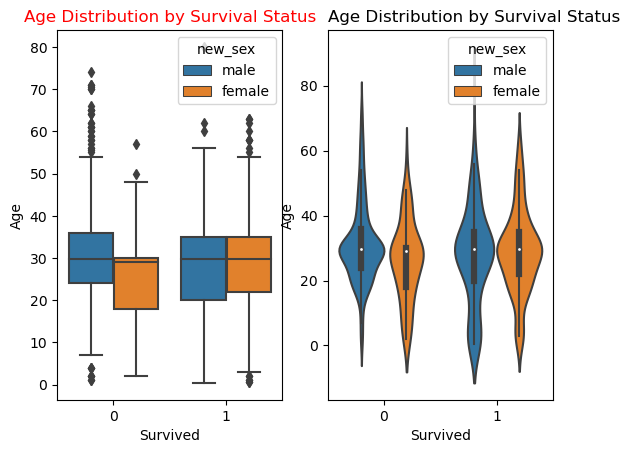

<Figure size 640x480 with 0 Axes>

In [236]:
# plot between age and survived
plt.subplot(121)
sns.boxplot(x='Survived', y='Age', data=read_data,hue='new_sex')
plt.title('Age Distribution by Survival Status',color='red')


# Violin plot
plt.subplot(122)
sns.violinplot(x='Survived', y='Age', data=read_data,hue='new_sex')
plt.title('Age Distribution by Survival Status',loc='left')
plt.show()
plt.tight_layout()


Text(0.5, 1.0, 'Distribution of Age reply on Pclass')

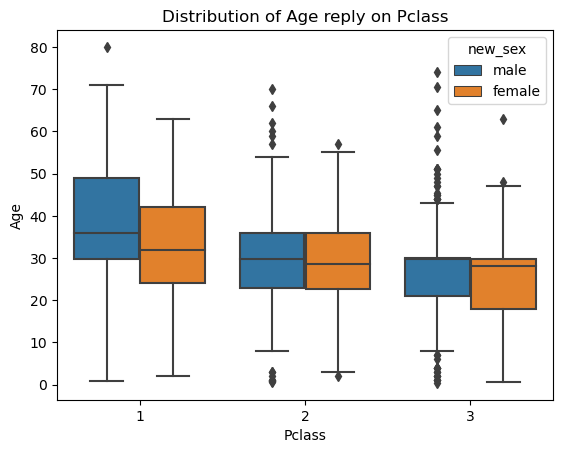

In [237]:
#Pclass with Age using boxplot
sns.boxplot(x='Pclass',y='Age',data=read_data,hue='new_sex')
plt.title('Distribution of Age reply on Pclass')

Text(0.5, 1.0, 'Distribution of sex spending for fare')

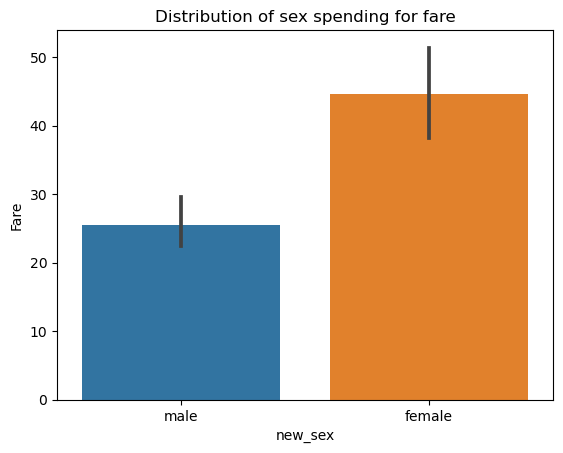

In [238]:
#barplot(sex and fare)
sns.barplot(x='new_sex',y='Fare',data=read_data)
plt.title('Distribution of sex spending for fare')

Text(0.5, 1.0, 'Distribution of Survived reply on fare')

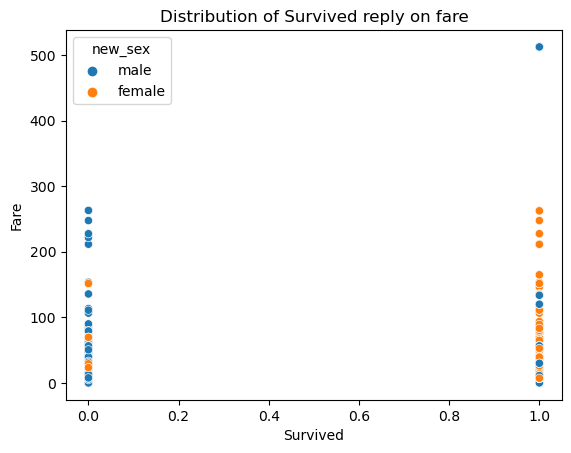

In [239]:
sns.scatterplot(x='Survived',y='Fare',data=read_data,hue='new_sex')
plt.title('Distribution of Survived reply on fare')

In [240]:
read_data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeRange,prefix_name,new_sex
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,Adults,Mr,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,Adults,Mrs,female
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adults,Miss,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,Adults,Mrs,female
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,Adults,Mr,male


In [241]:
target=read_data['Survived']

In [242]:
read_data=read_data.drop('Survived',axis=1)

In [243]:
X=read_data

# Simple Imputer

### Fill_missing value

In [244]:
from sklearn.impute import SimpleImputer

In [245]:
imp_fre=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
X['Embarked']=imp_fre.fit_transform(X[['Embarked']])

In [246]:
unk_cabin=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
X['Cabin']=unk_cabin.fit_transform(X[['Cabin']])

In [247]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Ticket       891 non-null    object 
 7   Fare         891 non-null    float64
 8   Cabin        891 non-null    object 
 9   Embarked     891 non-null    object 
 10  AgeRange     891 non-null    object 
 11  prefix_name  891 non-null    object 
 12  new_sex      891 non-null    object 
dtypes: float64(2), int64(4), object(7)
memory usage: 90.6+ KB


In [248]:
X.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeRange,prefix_name,new_sex
0,1,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,B96 B98,S,Adults,Mr,male
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,Adults,Mrs,female
2,3,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,Adults,Miss,female
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,Adults,Mrs,female
4,5,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,B96 B98,S,Adults,Mr,male


## Scaler with Minmaxscaler and Onehotencoder

In [249]:
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

In [250]:
categorical=read_data.select_dtypes(include='object').columns.to_list()
numerical=read_data.select_dtypes(include='int64').columns.to_list()

In [251]:
#categorical scaler and #numeric scaler
transform=ColumnTransformer(transformers=[('onehot',OneHotEncoder(),categorical),('scaler',MinMaxScaler(),numerical)
                                                   ],remainder='passthrough')
#Apply the column transformer to your data
X_tranformed=transform.fit_transform(X)

In [257]:
print(X_tranformed.shape)

(891, 1753)


# Train model

### Link view road to model that we need

https://stackoverflow.com/questions/2595176/which-machine-learning-classifier-to-choose-in-general

# Linear Support Vector Classification.